##Examen 3

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as integrate


1. Espacio de configuraciones

In [221]:
# Definir condiciones iniciales.
Po = [4,0]
m = 0.2
k = 1
t = np.linspace(0,20,100)

In [222]:
#crear la funcion con la ecuacion que da colo resultado la velocidad.
def function (y,ti):
  x,v= y
  dy_dt=[v,-np.sqrt(k/m)*x]
  return dy_dt

In [223]:
# Hallar valores de x y v
inte = integrate.odeint(function,Po,t)
X = inte[0:,0]
V = inte[0:,1]

# Creacion de tabla para visualizar los datos.
espacio = pd.DataFrame(inte,
             columns=['x',
                      'v'])
espacio.head()

,x,v
0,4.000000,0.000000
1,3.818866,-1.779566
2,3.291870,-3.397962
3,2.466739,-4.708615
4,1.418203,-5.592824


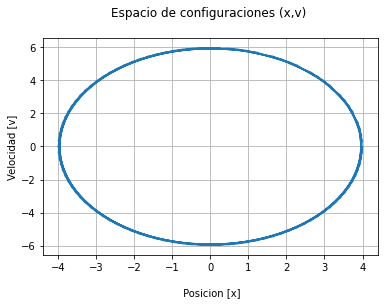

In [224]:
# Graficar el espacio de configuraciones.
plt.plot(X,V)

plt.xlabel('\n Posicion [x]')
plt.ylabel('Velocidad [v]')
plt.title('Espacio de configuraciones (x,v) \n')

plt.grid()
plt.show()

2. Decaimiento radioactivo.

In [225]:
# Lectura del archivo y creacion del dataframe.
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df.columns = ['t','N_t'] # Cambio del nombre de la columna N(t), para que no genere problemas.
df.head()

,t,N_t
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370


In [226]:
t = df['t'].values  # sacar los datos de t y n_t para un mejor manejo.
n_t = df['N_t'].values
No = df.N_t[0]

funcion = lambda t,l: No*np.exp(-l*t) # definir la funcion a usar.

n,e_n = curve_fit(funcion,t,n_t) # realizar fit a los datos y hallar el error.
n_fit = funcion(t,*n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [227]:
# A. Determinar vida media con su error.
T = np.log(2)/n # vida media.
e_T = (np.log(2)/(n**2))*e_n # error de la vida media.

print('La vida media es: {:.4f}'.format(T[0]), '± {:.4f}'.format(e_T[0][0]))

La vida media es: 27.9916 ± 0.0001


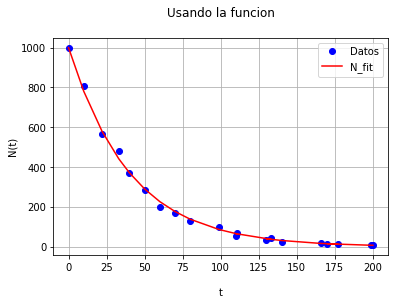

In [228]:
# B. Graficar.
plt.plot(t,n_t,'bo')
plt.plot(t,n_fit, color='red')

plt.xlabel('\nt')
plt.ylabel('N(t)')
plt.title('Usando la funcion\n')
plt.legend(['Datos','N_fit'])

plt.grid()
plt.show()